# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [87]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cur = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [89]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT COUNT(*) AS num_products_under_10
    FROM Products
    WHERE Price < 10;
""")

rows = cur.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [90]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS num_suppliers
    FROM Suppliers
    GROUP BY Country
    ORDER BY num_suppliers DESC;                                 
""")

# TODO: Fetch your list of tuples and print it out
suppliers_data = cur.fetchall()
print(suppliers_data)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  num_suppliers
0           USA              4
1       Germany              3
2        France              3
3            UK              2
4        Sweden              2
5         Japan              2
6         Italy              2
7        Canada              2
8     Australia              2
9         Spain              1
10    Singapore              1
11       Norway              1
12  Netherlands              1
13      Finland              1
14      Denmark              1
15       Brazil              1


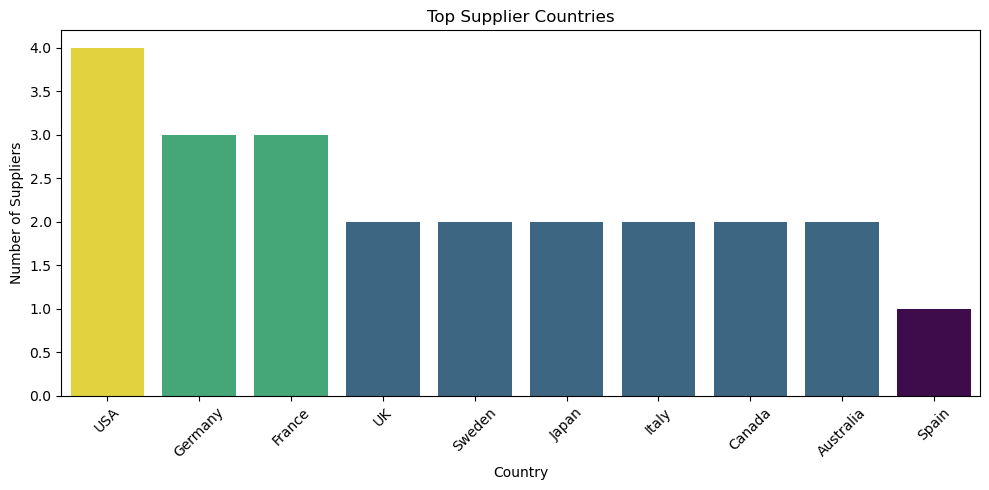

In [91]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(suppliers_data, columns=["Country", "num_suppliers"])
print(df)
# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,5))  # Set size of the chart
sns.barplot(data=df.head(10), x='Country', y='num_suppliers', hue='num_suppliers', palette='viridis', legend=False)
plt.title("Top Supplier Countries")
plt.xlabel("Country")
plt.ylabel("Number of Suppliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [92]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS num_customers
    FROM Customers
    GROUP BY Country
    ORDER BY num_customers DESC;
""")


# TODO: Fetch your list of tuples and print it out
customers_data = cur.fetchall()
print(customers_data)


[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


   Country  num_customers
0      USA             13
1  Germany             11
2   France             11
3   Brazil              9
4       UK              7


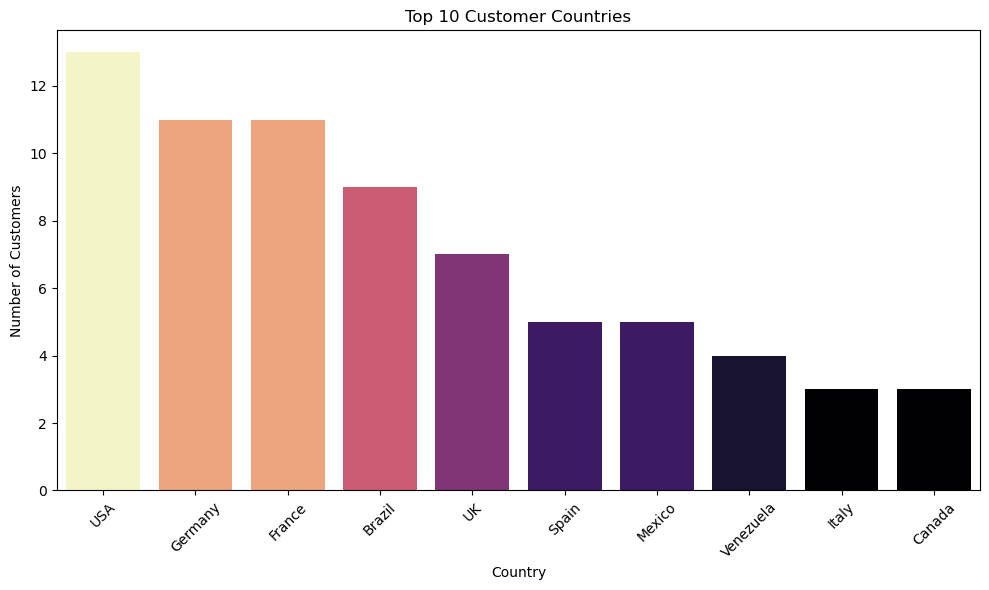

In [93]:
# TODO: Convert your list of tuples to a dataframe
df3 = pd.DataFrame(customers_data, columns=["Country", "num_customers"])
print(df3.head())

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(data=df3.head(10), x='Country', y='num_customers', hue='num_customers', palette='magma', legend=False)
plt.title("Top 10 Customer Countries")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [94]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT p.ProductName, SUM(od.Quantity) AS total_quantity_ordered
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY total_quantity_ordered ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
quantity_data = cur.fetchall()
print(quantity_data)


[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


                 ProductName  total_quantity_ordered
0  Laughing Lumberjack Lager                       5
1                Røgede sild                      15
2        Gustaf's Knäckebröd                      18
3            Mishi Kobe Niku                      20
4               Genen Shouyu                      25


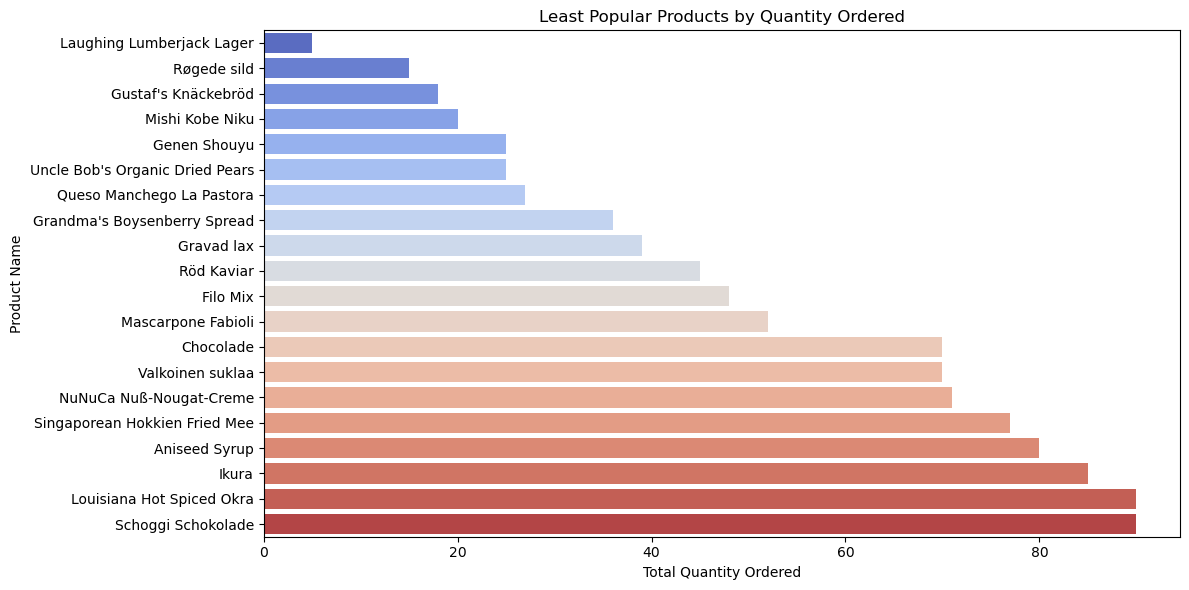

In [95]:
# TODO: Convert your list of tuples to a dataframe
df4 = pd.DataFrame(quantity_data, columns=['ProductName', 'total_quantity_ordered'])
print(df4.head())

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data=df4, x='total_quantity_ordered', y='ProductName', hue='ProductName', palette='coolwarm', legend=False)
plt.title("Least Popular Products by Quantity Ordered")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [96]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT p.ProductName,
    SUM(od.Quantity * p.Price) AS total_revenue
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY total_revenue ASC
    LIMIT 20;
""")


# TODO: Fetch your list of tuples and print it out
revenue_data = cur.fetchall()
print(revenue_data)


[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


                 ProductName  total_revenue
0  Laughing Lumberjack Lager           70.0
1                Røgede sild          142.5
2                   Filo Mix          336.0
3        Gustaf's Knäckebröd          378.0
4               Genen Shouyu          387.5


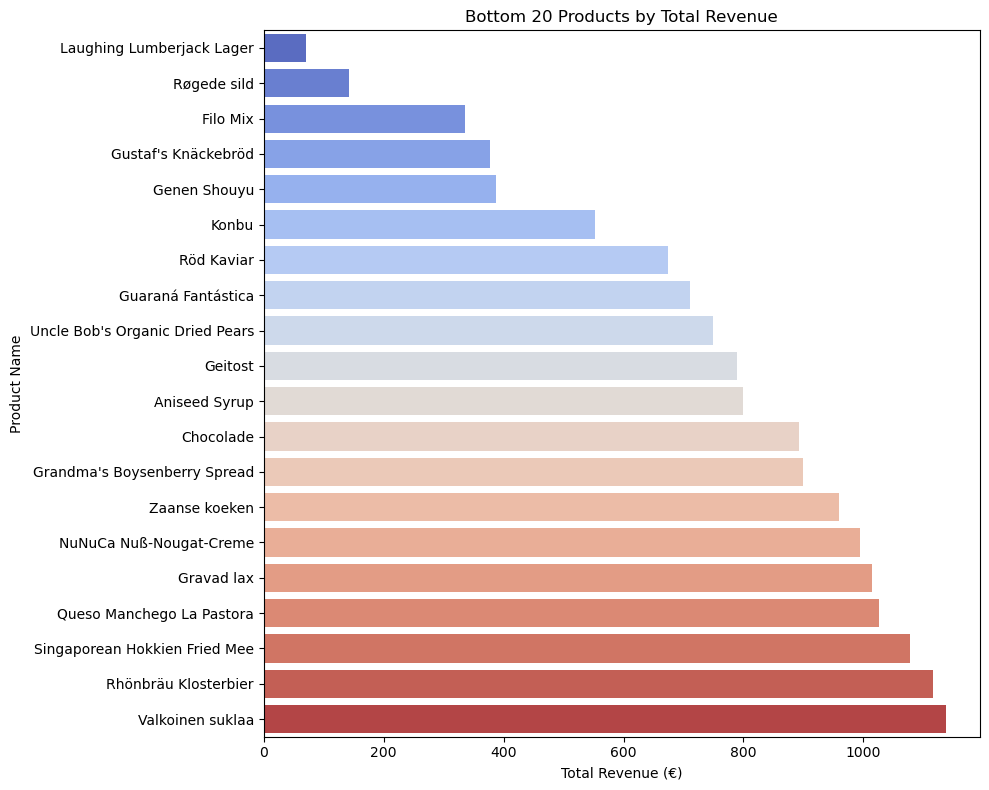

In [97]:
# TODO: Convert your list of tuples to a dataframe
df5 = pd.DataFrame(revenue_data, columns=['ProductName', 'total_revenue'])
print(df5.head())


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 8))
sns.barplot(data=df5, x='total_revenue', y='ProductName',hue='ProductName', palette='coolwarm', legend=False)
plt.title('Bottom 20 Products by Total Revenue')
plt.xlabel('Total Revenue (€)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [98]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""SELECT c.Country, COUNT(*) AS total_orders
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.Country
ORDER BY total_orders DESC;

""")

# TODO: Fetch your list of tuples and print it out
mostorders_data = cur.fetchall()
print(mostorders_data)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


   Country  total_orders
0      USA            29
1  Germany            25
2   Brazil            19
3   France            18
4  Austria            13


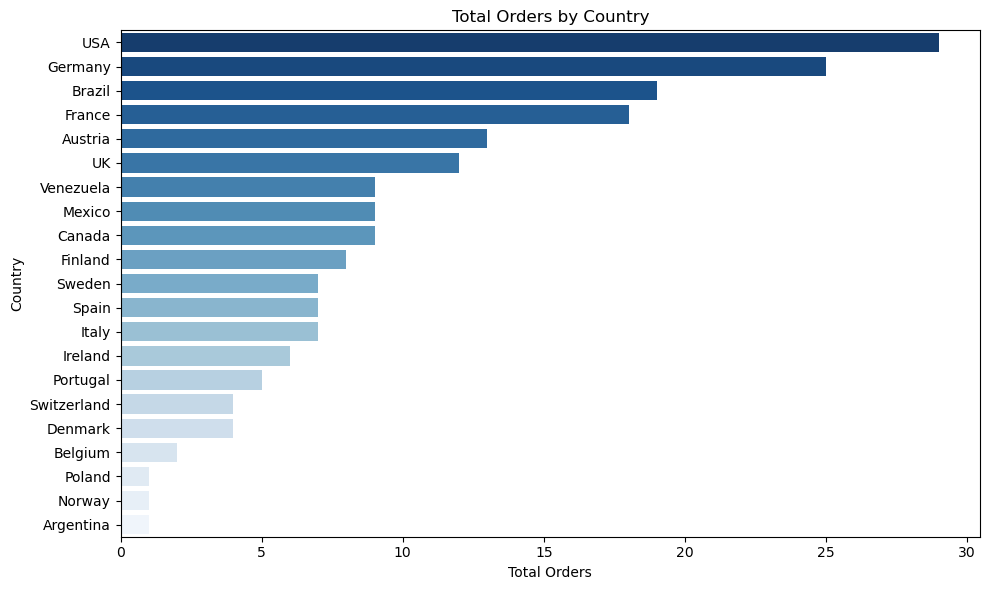

In [99]:
# TODO: Convert your list of tuples to a dataframe
df6 = pd.DataFrame(mostorders_data, columns=['Country', 'total_orders'])
print(df6.head())


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(data=df6, x='total_orders', y='Country',hue='Country', palette='Blues_r',legend=False)
plt.title('Total Orders by Country')
plt.xlabel('Total Orders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [100]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""SELECT c.Country, COUNT(*) AS num_customers_without_orders
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
WHERE o.OrderID IS NULL
GROUP BY c.Country
ORDER BY num_customers_without_orders DESC;

""")

# TODO: Fetch your list of tuples and print it out
noorder_data = cur.fetchall()
print(noorder_data)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


     Country  num_customers_without_orders
0        USA                             5
1     France                             4
2    Germany                             2
3  Argentina                             2
4         UK                             1


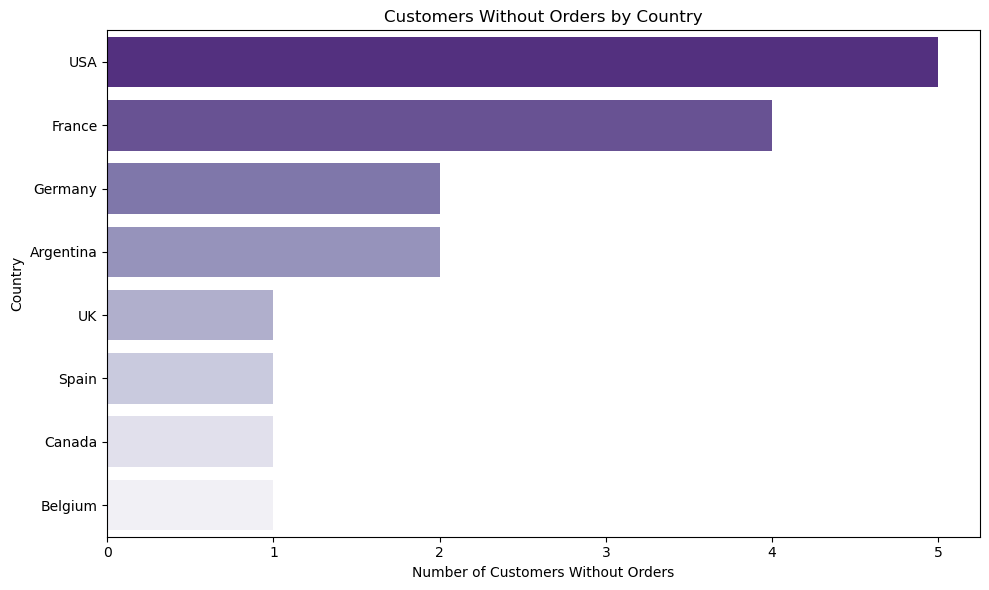

In [101]:
# TODO: Convert your list of tuples to a dataframe
df7 = pd.DataFrame(noorder_data, columns=['Country', 'num_customers_without_orders'])
print(df7.head())

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(data=df7, x='num_customers_without_orders', y='Country', hue='Country', palette='Purples_r',legend=False)
plt.title('Customers Without Orders by Country')
plt.xlabel('Number of Customers Without Orders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [102]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""SELECT s.SupplierName, COUNT(*) AS num_orders
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.SupplierName
ORDER BY num_orders DESC;

""")

# TODO: Fetch your list of tuples and print it out
popularsupplier_data = cur.fetchall()
print(popularsupplier_data) 


[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


                        SupplierName  num_orders
0  Plutzer Lebensmittelgroßmärkte AG          42
1                      Pavlova, Ltd.          40
2           Specialty Biscuits, Ltd.          33
3                    Norske Meierier          32
4            Formaggi Fortini s.r.l.          31


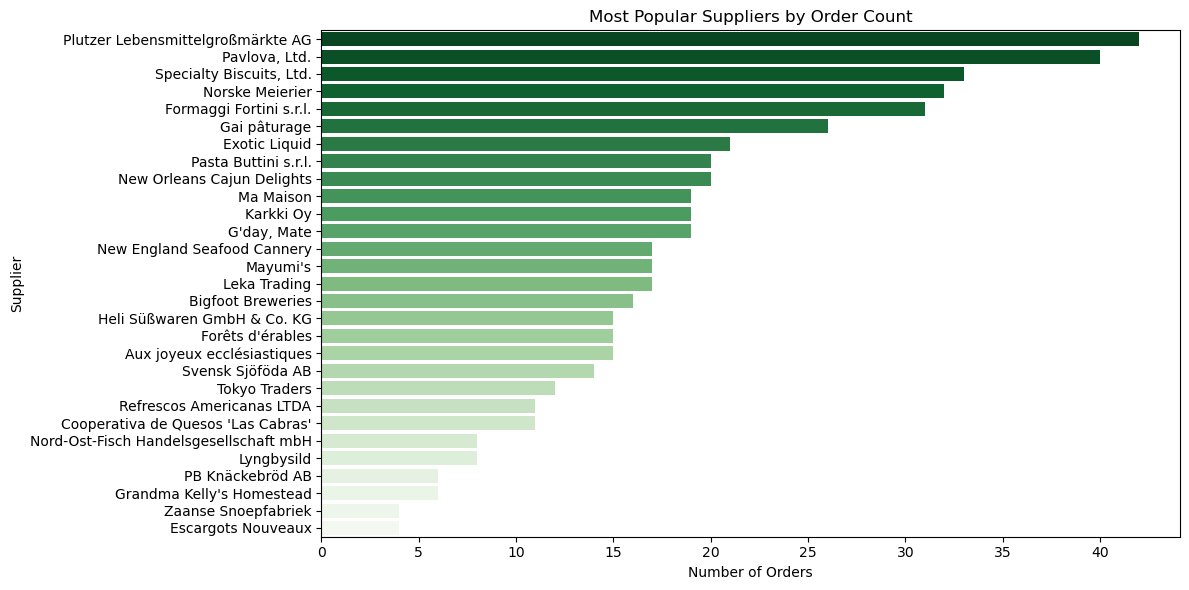

In [103]:
# TODO: Convert your list of tuples to a dataframe
df8 = pd.DataFrame(popularsupplier_data, columns=['SupplierName', 'num_orders'])
print(df8.head())


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data=df8, x='num_orders', y='SupplierName', hue='SupplierName', palette='Greens_r',legend=False)
plt.title('Most Popular Suppliers by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The countries with the greatest number of customers are USA (13 customers), Germany (11), and France (11). This insight was gathered from our SQL query of the Customers table and visualized in a bar chart titled "Top 10 Customer Countries" from question 3. When analyzing supplier count by country (from Question 2), the USA also had the most suppliers with 4, followed by Germany, France, who both had 3. The below graph titled "Correlation between Number of Suppliers and Customers by Country" suggests a positive correlation between the number of customers and the number of suppliers in a country.

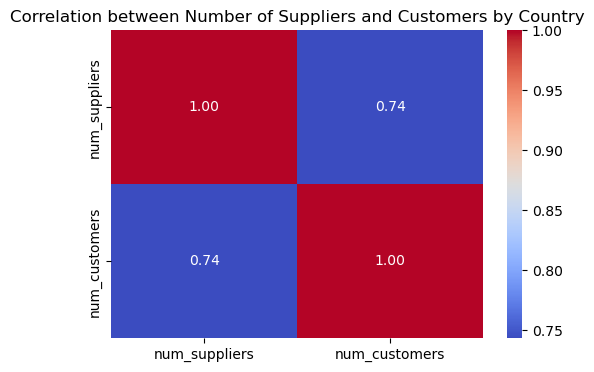

In [104]:
df_suppliers = pd.DataFrame(suppliers_data, columns=["Country", "num_suppliers"])
df_customers = pd.DataFrame(customers_data, columns=["Country", "num_customers"])

# merge dataframes
merged_df = pd.merge(df_suppliers, df_customers, on="Country")



# Calculate correlation matrix
correlation_matrix = merged_df[["num_suppliers", "num_customers"]].corr()
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Number of Suppliers and Customers by Country")
plt.show()



### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular product by order quantity is Laughing Lumberjack Lager, which is shown in the “Least Popular Products by Quantity Ordered” visualization from Question 4.

Graph below titled "Quantity Ordered vs Revenue per Product" which has data merged from the Questions 4 and 5 shows a correlation of .69. That .69 correlations states that there is a moderate positive correlation between the quantity of a product sold and the revenue it generates.

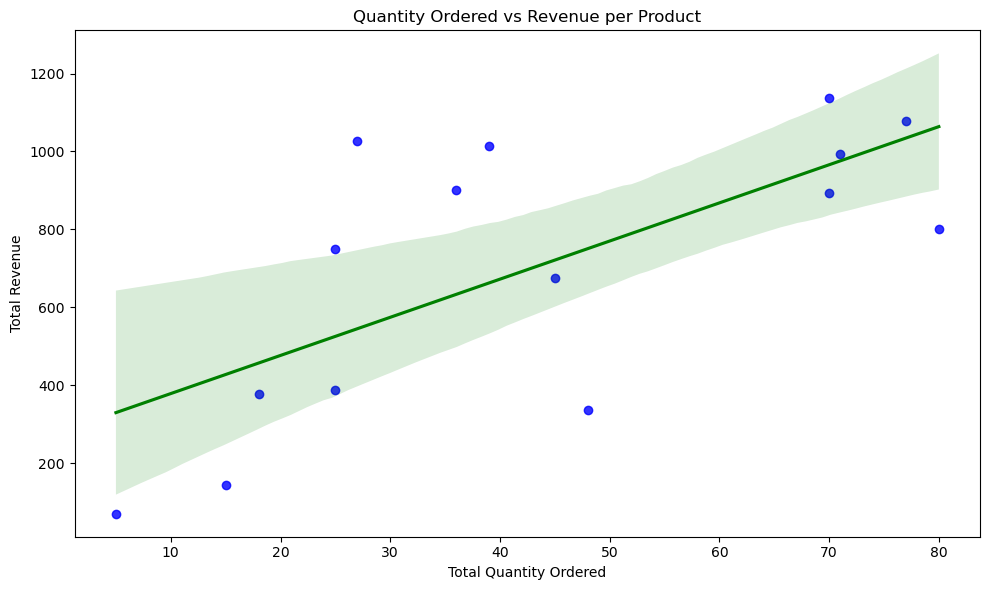

Correlation coefficient: 0.69


In [105]:
df_quantity=pd.DataFrame(quantity_data, columns=['ProductName', 'total_quantity_ordered'])
df_revenue=pd.DataFrame(revenue_data, columns=['ProductName', 'total_revenue'])

# merge dataframes
df_merge = pd.merge(df_quantity, df_revenue, on="ProductName")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merge,
    x='total_quantity_ordered',
    y='total_revenue',
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'green'}
)
plt.title('Quantity Ordered vs Revenue per Product')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

correlation = df_merge["total_quantity_ordered"].corr(df_merge["total_revenue"])
print(f"Correlation coefficient: {correlation:.2f}")

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The country that has the most orders is USA with 29 total orders, followed by Germany with 25, as shown in question 6 visualization titled "Total Orders by Country." This correlates with the number of customers who do not order, for example the USA not only has the most orders but also has most non-ordering customers with a total of 5. This is shown in the visualization from question 7 titled,"Number of Customers Without Orders". There is further evidence with the below visualization titled "Relationship Between Total Orders and Non-Ordering Customers by Country" which shows a correlatoin of .72 and indicates a strong positive correlation.

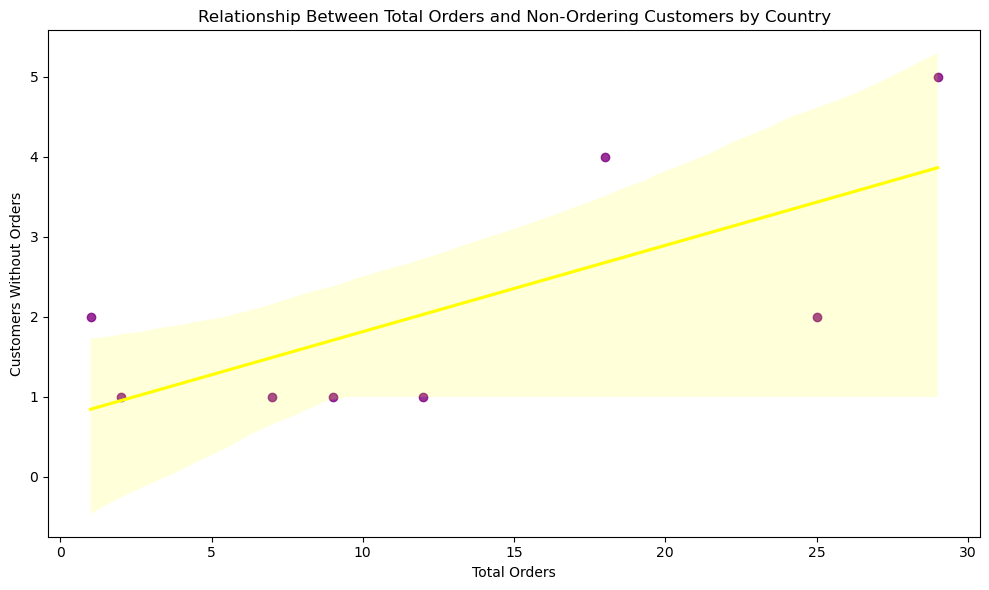

Correlation coefficient: 0.72


In [106]:
df_mostorders=pd.DataFrame(mostorders_data, columns=['Country', 'total_orders'])
df_noorder=pd.DataFrame(noorder_data, columns=['Country', 'num_customers_without_orders'])

# Merge the two DataFrames on Country

df_merged_orders = pd.merge(df_mostorders, df_noorder, on="Country")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merged_orders,
    x="total_orders",
    y="num_customers_without_orders",
    scatter_kws={'color': 'purple'},
    line_kws={'color': 'yellow'}
)
plt.title("Relationship Between Total Orders and Non-Ordering Customers by Country")
plt.xlabel("Total Orders")
plt.ylabel("Customers Without Orders")
plt.tight_layout()
plt.show()

correlation = df_merged_orders["total_orders"].corr(df_merged_orders["num_customers_without_orders"])
print(f"Correlation coefficient: {correlation:.2f}")

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier that has the most orders is Plutzer Lebensmittelgroßmärkte AG with 42 total orders followed by Pavlova, Ltd with 40. This is supported by the visualization from question 8 titled "Most Popular Suppliers by Order Count".